<a href="https://colab.research.google.com/github/shivanipoosala/DAFEML/blob/main/dafeml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df=pd.read_csv("/content/drive/MyDrive/churn dataset.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.index

RangeIndex(start=0, stop=7043, step=1)

In [ ]:
df.size

147903

In [ ]:
df.ndim

2

In [ ]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [ ]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5624,4462-CYWMH,Male,1,Yes,No,62,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.8,5629.55,No


In [ ]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [ ]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SeniorCitizen      0.162147
tenure            32.371149
MonthlyCharges    64.761692
dtype: float64

In [ ]:
df.mode()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Male,0.0,No,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
1,0003-MKNFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN
2,0004-TLHLJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-EXCHZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,9992-RRAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,9992-UJOEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,9993-LHIEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SeniorCitizen      0.368612
tenure            24.559481
MonthlyCharges    30.090047
dtype: float64

In [ ]:
df.min()

customerID                         0002-ORFBO
gender                                 Female
SeniorCitizen                               0
Partner                                    No
Dependents                                 No
tenure                                      0
PhoneService                               No
MultipleLines                              No
InternetService                           DSL
OnlineSecurity                             No
OnlineBackup                               No
DeviceProtection                           No
TechSupport                                No
StreamingTV                                No
StreamingMovies                            No
Contract                       Month-to-month
PaperlessBilling                           No
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          18.25
TotalCharges                                 
Churn                                      No
dtype: object

In [ ]:
df.max()

customerID            9995-HOTOH
gender                      Male
SeniorCitizen                  1
Partner                      Yes
Dependents                   Yes
tenure                        72
PhoneService                 Yes
MultipleLines                Yes
InternetService               No
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling             Yes
PaymentMethod       Mailed check
MonthlyCharges            118.75
TotalCharges               999.9
Churn                        Yes
dtype: object

In [ ]:
df.loc[:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.iloc[:,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.isna().all()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# check unique values of each column
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

# **2**. **Exploratory** **Data** **Analysis** **and** **Data** **Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# transform the column TotalCharges into a numeric data type
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['tenure'] 

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [ ]:
# null observations of the TotalCharges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

In [ ]:
# unique elements of the PaymentMethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
# remove (automatic) from payment method names
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [ ]:
# unique elements of the PaymentMethod column after the modification 
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

# **3. Data Visualization**

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

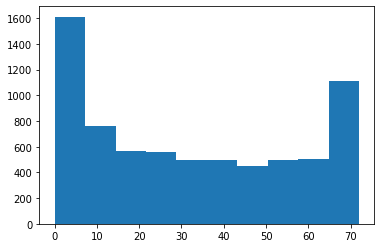

In [ ]:
plt.hist(data = df, x = 'tenure')

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

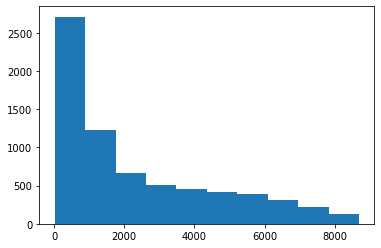

In [ ]:
plt.hist(data = df, x = 'TotalCharges')

Male      3555
Female    3488
Name: gender, dtype: int64


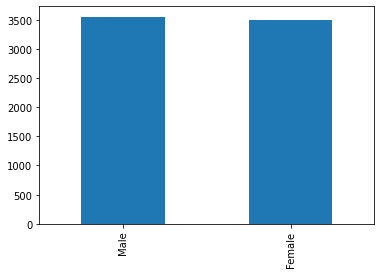

In [ ]:
# Visualize frequency count of Male/Female for given dataset using bar graph
print(df.gender.value_counts())
df.gender.value_counts().plot.bar()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


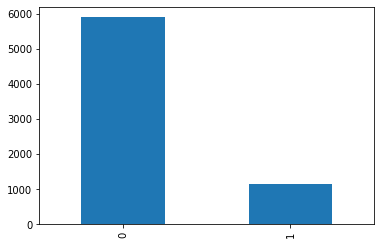

In [ ]:
# Visualize frequency count of 0/1 for given dataset using bar graph
print(df.SeniorCitizen.value_counts())
df.SeniorCitizen.value_counts().plot.bar()

No     3641
Yes    3402
Name: Partner, dtype: int64


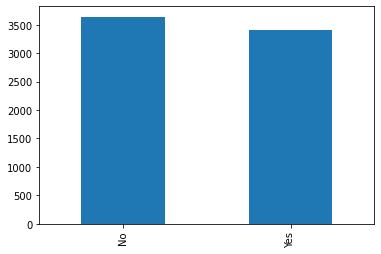

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Partner.value_counts())
df.Partner.value_counts().plot.bar()

No     4933
Yes    2110
Name: Dependents, dtype: int64


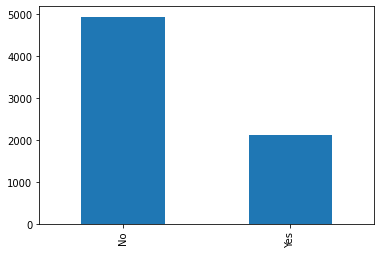

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Dependents.value_counts())
df.Dependents.value_counts().plot.bar()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


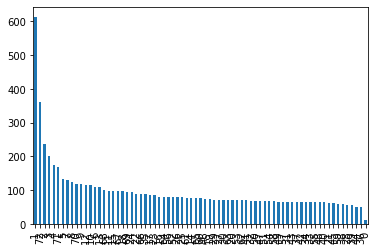

In [ ]:
# Visualize frequency count  for given dataset using bar graph
print(df.tenure.value_counts())
df.tenure.value_counts().plot.bar()

Yes    6361
No      682
Name: PhoneService, dtype: int64


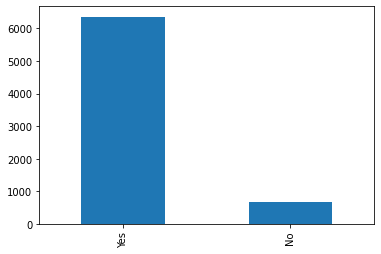

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.PhoneService.value_counts())
df.PhoneService.value_counts().plot.bar()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


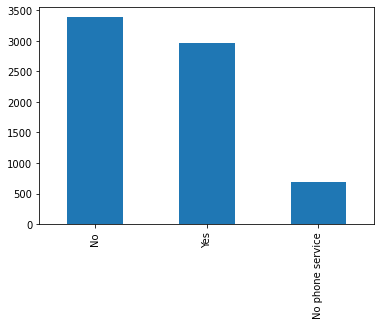

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.MultipleLines.value_counts())
df.MultipleLines.value_counts().plot.bar()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


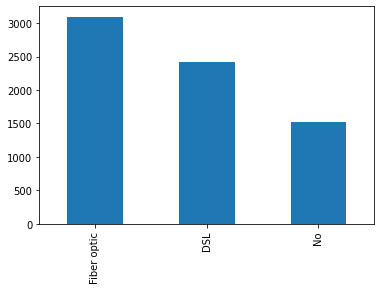

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.InternetService.value_counts())
df.InternetService.value_counts().plot.bar()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


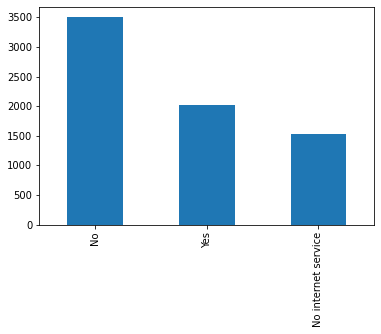

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.OnlineSecurity.value_counts())
df.OnlineSecurity.value_counts().plot.bar()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


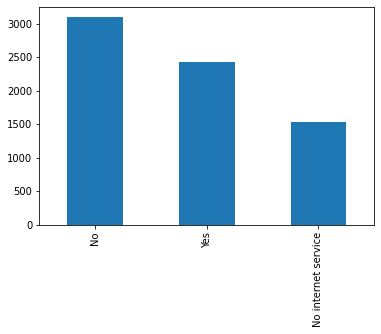

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.DeviceProtection.value_counts())
df.DeviceProtection.value_counts().plot.bar()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


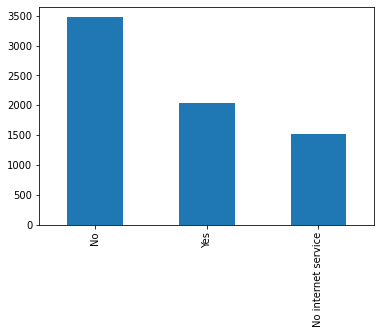

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.TechSupport.value_counts())
df.TechSupport.value_counts().plot.bar()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


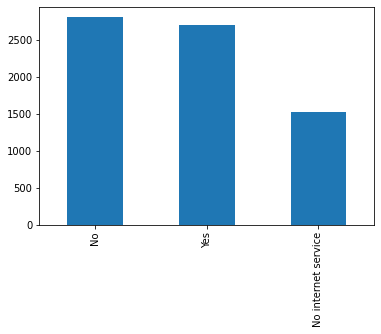

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.StreamingTV.value_counts())
df.StreamingTV.value_counts().plot.bar()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


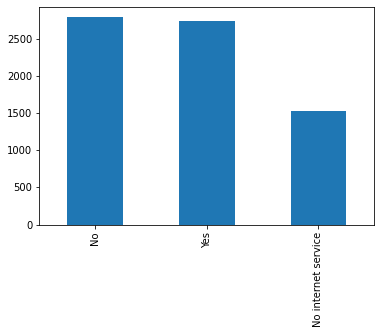

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.StreamingMovies.value_counts())
df.StreamingMovies.value_counts().plot.bar()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


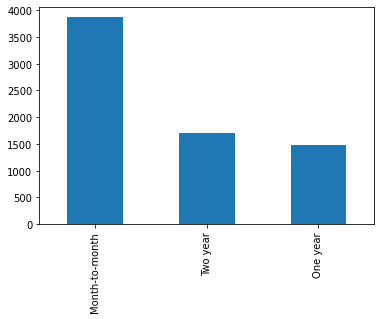

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.Contract.value_counts())
df.Contract.value_counts().plot.bar()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


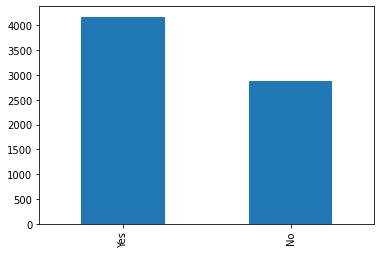

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.PaperlessBilling.value_counts())
df.PaperlessBilling.value_counts().plot.bar()

Electronic check    2365
Mailed check        1612
Bank transfer       1544
Credit card         1522
Name: PaymentMethod, dtype: int64


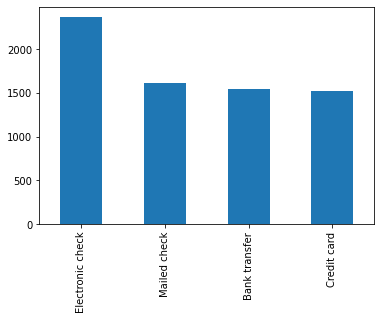

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.PaymentMethod.value_counts())
df.PaymentMethod.value_counts().plot.bar()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


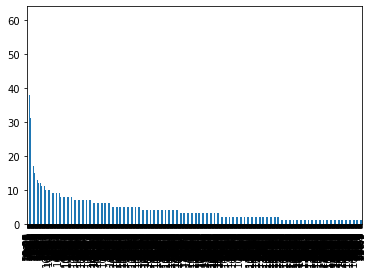

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.MonthlyCharges.value_counts())
df.MonthlyCharges.value_counts().plot.bar()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64


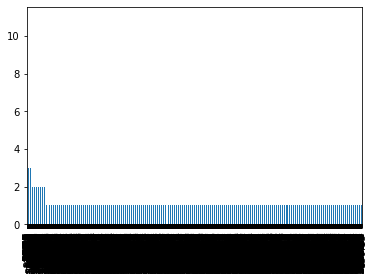

In [ ]:
# Visualize frequency count of No/yes for given dataset using bar graph
print(df.TotalCharges.value_counts())
df.TotalCharges.value_counts().plot.bar()

No     5174
Yes    1869
Name: Churn, dtype: int64


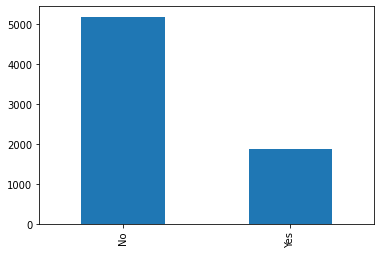

In [ ]:
# Visualize frequency count of No/Yes for given dataset using bar graph
print(df.Churn.value_counts())
df.Churn.value_counts().plot.bar()

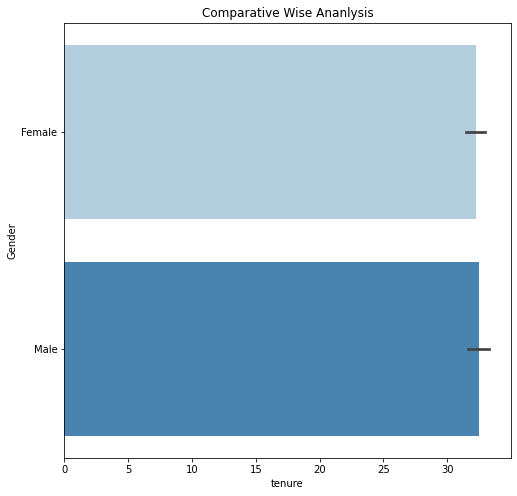

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
#Creating bar plot using seaborn
sns.barplot(x = 'tenure',y = 'gender',data = df,palette = "Blues")
#sns.barplot(x = 'tenure',y = 'gender',data = df,palette = "Blues")
#Adding the aesthetics
plt.title('Comparative Wise Ananlysis')
plt.xlabel('tenure')
plt.ylabel('Gender') 
# Show the plot
plt.show()

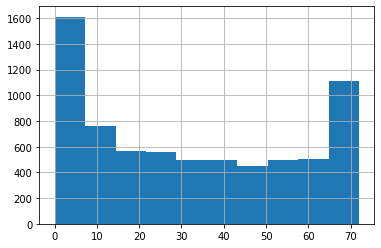

In [ ]:
# Visualize distribution of Age using Histogram
df.tenure.hist()

0 72


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0abff8810>,
      dtype=object)

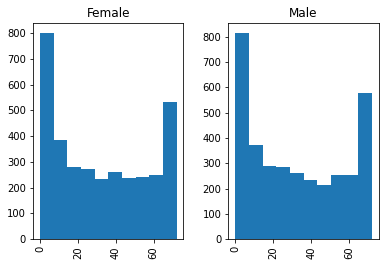

In [ ]:
# Visualize distribution of tenure along with gender using Histogram
print(df.tenure.min(),df.tenure.max())
df.hist(column="tenure",by="gender",bins=10)

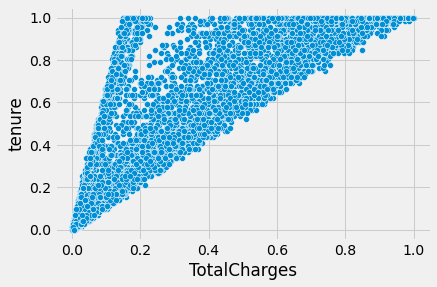

In [ ]:
# distribution of data between tenure and gender
sns.scatterplot(y = df.tenure,x=df.TotalCharges)

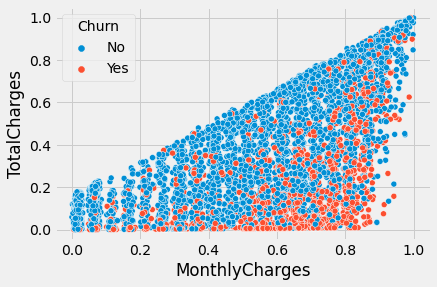

In [ ]:
sns.scatterplot(x='MonthlyCharges',y = 'TotalCharges',hue = 'Churn',data = df)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

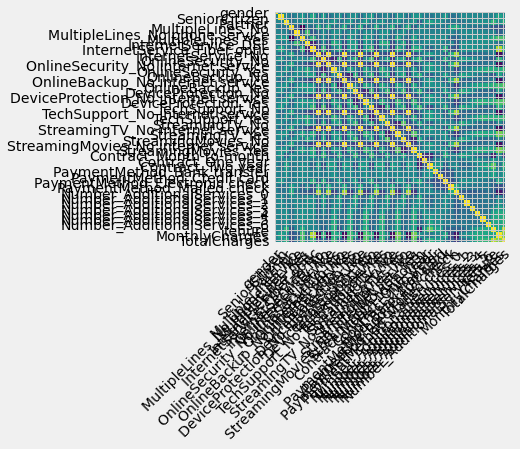

In [100]:
# Demonstrate generation of heatmap using matplotlib
import matplotlib.pyplot as plt
import numpy as np
corr = df.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)
# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

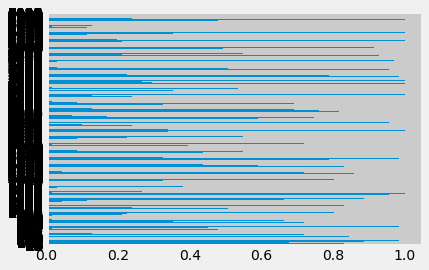

In [99]:
# Generate bar plot in horizontal using plot available in pandas
df.tenure.plot.barh()

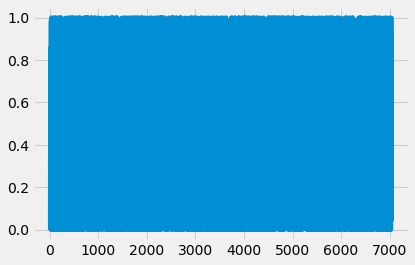

In [101]:
# Generate area plot using plot available in pandas
df.tenure.plot.area()

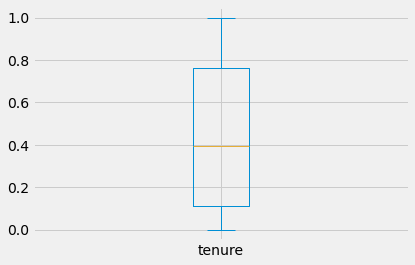

In [102]:
# Generate box plot for tenure columnn 
df.tenure.plot.box()

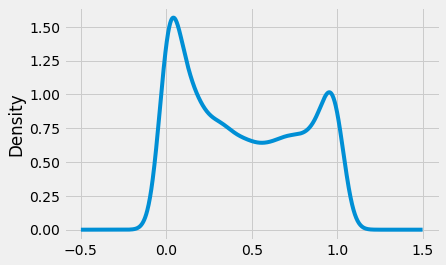

In [103]:
# Generate density plot for tenure columnn 
df.tenure.plot.density()

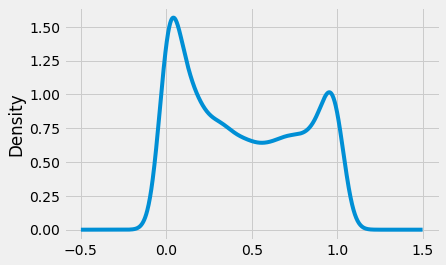

In [105]:
# Generate kernel density estimation plot for tenure columnn 
df.tenure.plot.kde()

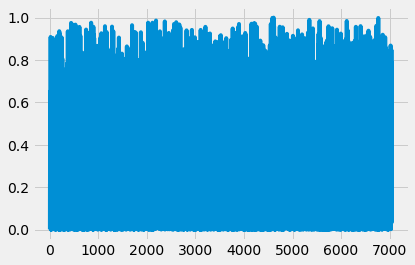

In [107]:
# Generate line plot for tenure columnn
df.TotalCharges.plot.line()

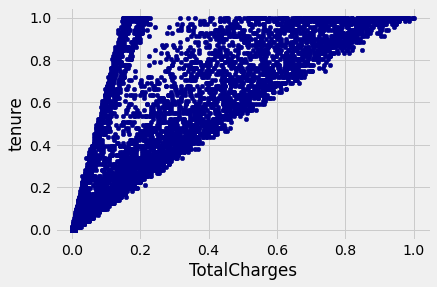

In [112]:
df.plot.scatter(x='TotalCharges',y='tenure', c='DarkBlue')

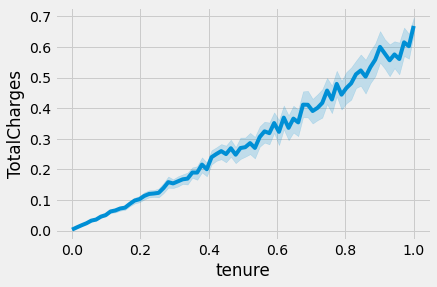

In [124]:
sns.lineplot(x=df.tenure,y=df.TotalCharges)


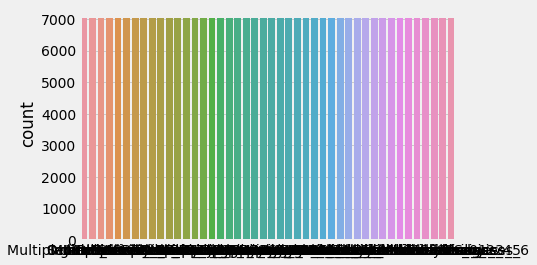

In [130]:
sns.countplot(data=df)

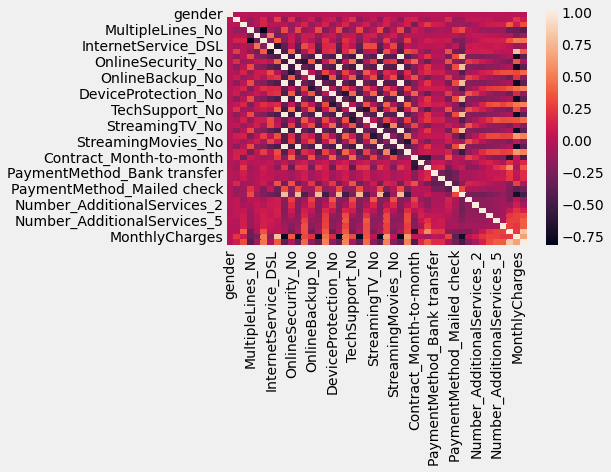

In [132]:
sns.heatmap(df.corr())

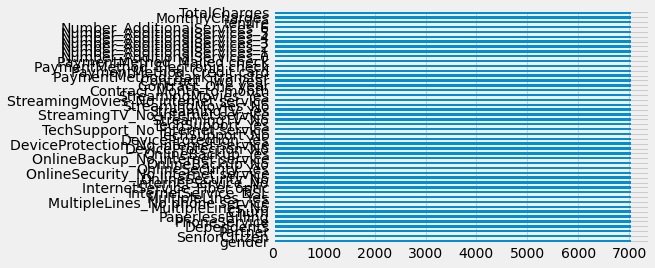

In [134]:
# generate bar chart in horizontal way for entire dataset 
df.count().plot.barh()

# Data Exploration

In [ ]:
#Apply the Fivethirtyeight style to all plots
plt.style.use("fivethirtyeight")

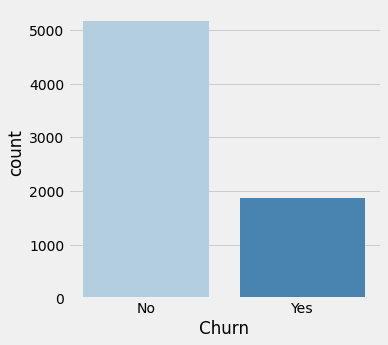

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=df['Churn'],palette="Blues",linewidth=1)
plt.show()

In [ ]:
#Create a function to generate boxplots
plots={1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,256]}
def boxplot(x,y,df):
  rows=int(str(plots[len(y)][0])[0])
  columns=int(str(plots[len(y)][0])[1])
  plt.figure(figsize=(7*columns,7*rows))
  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax=sns.boxplot(x=x,y=j,data=df[[x,j]],palette="Blues",linewidth=1)
    ax.set_title(j)
  return plt.show()

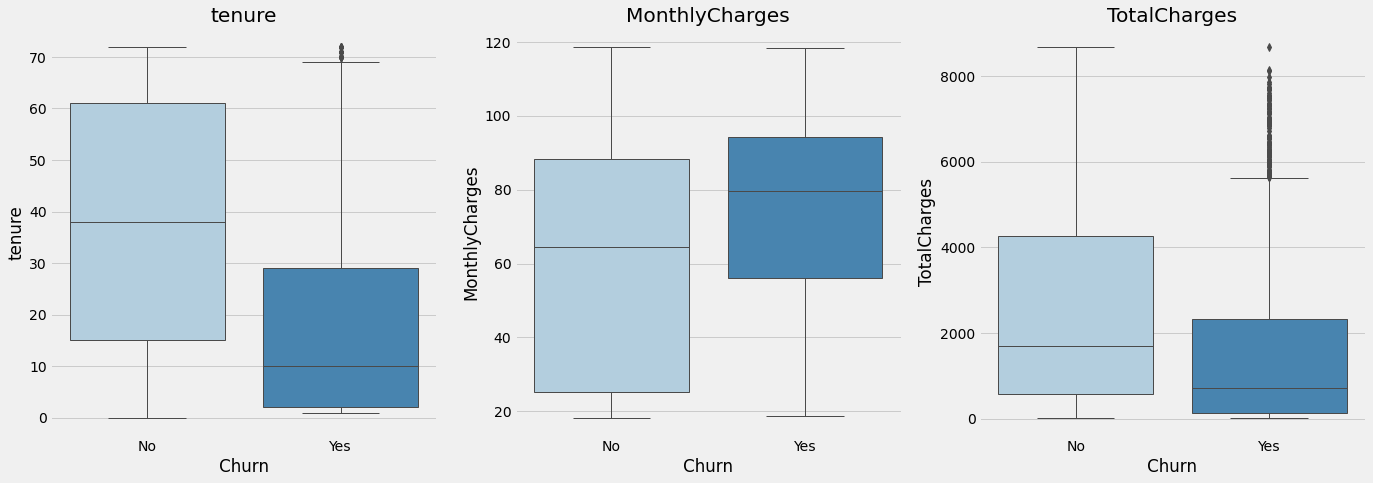

In [ ]:
#Generate boxplts for tenure,Monthlycharges and Totalcharges
boxplot("Churn",["tenure","MonthlyCharges","TotalCharges"],df)

In [ ]:
#Create a function to generate countplots
def countplot(x,y,df):
  rows=int(str(plots[len(y)][0])[0])
  columns=int(str(plots[len(y)][0])[1])
  plt.figure(figsize=(7*columns,7*rows))

  for i,j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax=sns.countplot(x=j,hue=x,data=df,palette='Blues',alpha=0.8,linewidth=0.4,edgecolor='black')
    ax.set_title(j)
  return plt.show


<function matplotlib.pyplot.show(*args, **kw)>

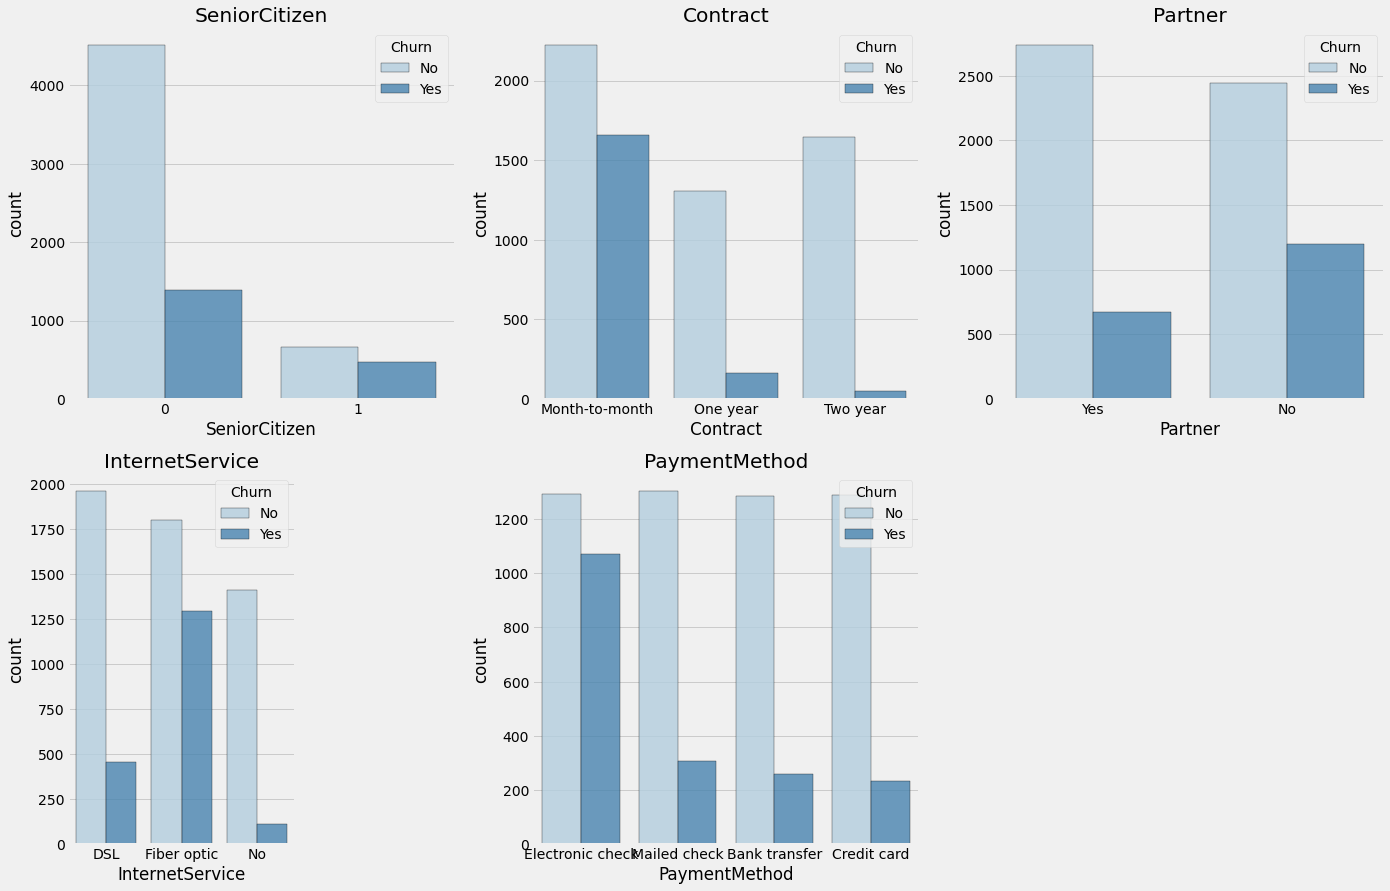

In [ ]:
#Generate countplots for various features
countplot("Churn",['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'],df)

## **Check** **for** **Outliers** **in** **Numerical** **Features**

In [ ]:
#Check of outliers by applying the IQR method checking if values are way outside the IQR borders
numerical_features=["tenure","MonthlyCharges","TotalCharges"]
df_num=df[numerical_features]
df_num.describe()

Q1=df_num.quantile(0.25)
Q3=df_num.quantile(0.75)
IQR=Q3-Q1
IQR
((df_num<(Q1-1.5*IQR))|(df_num>(Q3+1.5*IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

## Data Cleaning

In [ ]:
#Drop the rows with missing values
df=df.dropna( )

# Step 4: Feature Engineering

In [ ]:
df["Number_AdditionalServices"]=(df[["OnlineSecurity","DeviceProtection","StreamingMovies","TechSupport","StreamingTV","OnlineBackup"]]=='Yes').sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(*args, **kw)>

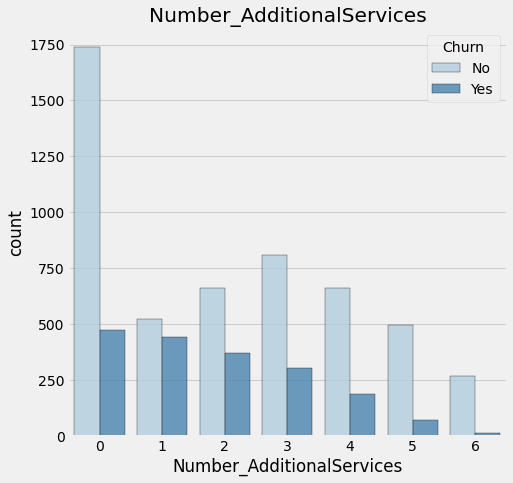

In [ ]:
#Generate countplot for new feature
countplot('Churn',['Number_AdditionalServices'],df)

# Label Encoding

In [ ]:
features_le=['gender','Partner','Dependents','Churn','PhoneService','PaperlessBilling']

def label_encoding(features,df):
  for i in features:
    df[i]=df[i].map({'Yes':1,'No':0})
    return
label_encoding(['Partner','Dependents','Churn','PhoneService','PaperlessBilling'],df)
df['gender']=df['gender'].map({'Female':1,'Male':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#One-Hot-Encoding

In [ ]:
#One-Hot-Encoding for identified columns
features_ohe=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Number_AdditionalServices']
df =pd.get_dummies(df,columns=features_ohe)

# Feature Rescaling: Min-Max-Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features_mms=['tenure','MonthlyCharges','TotalCharges']
df_features_mms=pd.DataFrame(df,columns=features_mms)
df_remaining_features=df.drop(columns=features_mms)

mms=MinMaxScaler()
rescaled_features=mms.fit_transform(df_features_mms)
df_rescaled_features=pd.DataFrame(rescaled_features,columns=features_mms,index=df_remaining_features.index)
df=pd.concat([df_remaining_features,df_rescaled_features],axis=1)

# Correlation analysis

In [ ]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

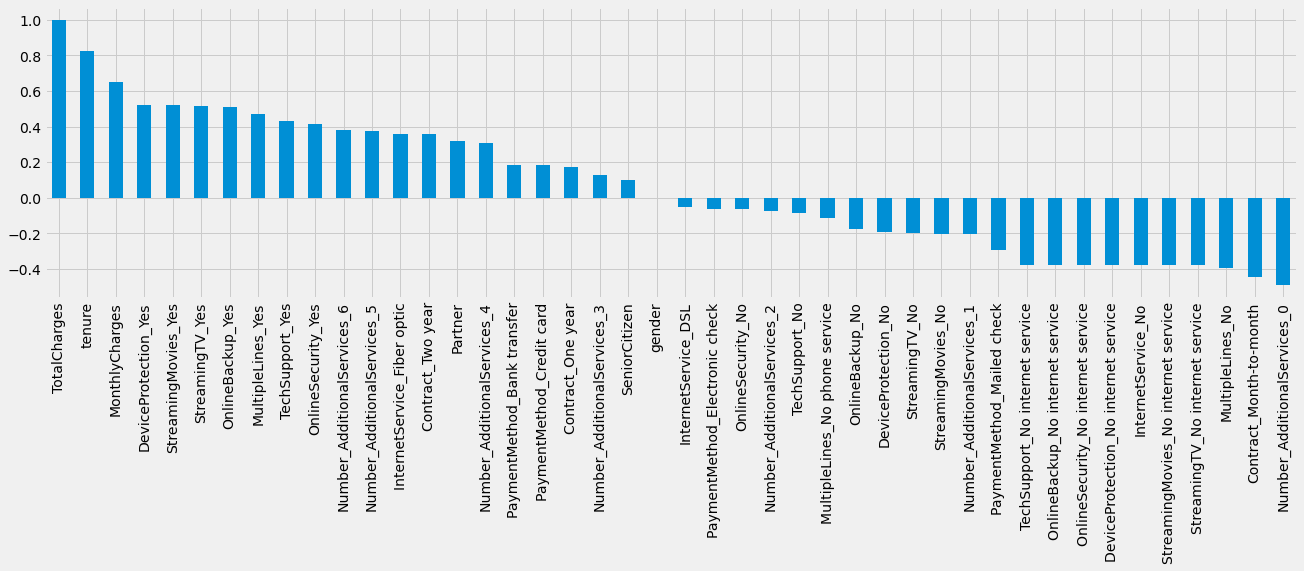

In [ ]:
#show correlation plot for correlation of churn with each of the remaining features
plt.figure(figsize=(16,10))
df.corr()['TotalCharges'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))